# Task 1: Get the dataset on screen

In [9]:
import pandas as pd
# read the dataset as pd dataform
base='blood_transfusion.csv'
mydata = pd.read_csv(base)
df = pd.DataFrame(data=mydata)
# check the info of the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_since_last_donation   748 non-null    float64
 1   total_number_of_donations    748 non-null    float64
 2   total_blood_donated          748 non-null    float64
 3   months_since_first_donation  748 non-null    float64
 4   class                        748 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 29.3 KB


,months_since_last_donation,total_number_of_donations,total_blood_donated,months_since_first_donation,class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


From above, we obverse that 
1. no missing variable  
2. 5 variable in total. 4 of them is numerical, 1 is the Nominal

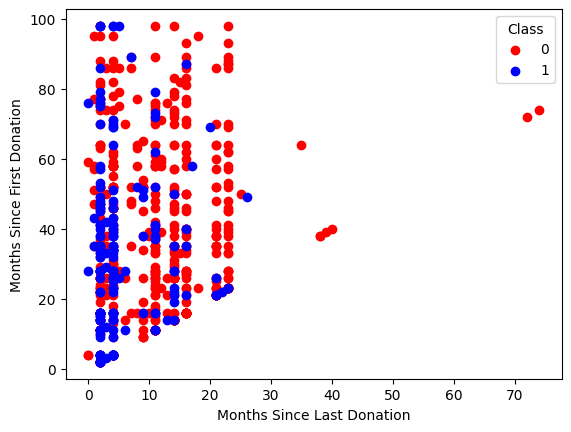

In [21]:
# visualize the data
import matplotlib.pyplot as plt

# Separate the data into two groups based on the 'class' column
class_0 = df[df["class"] == 0]
class_1 = df[df["class"] == 1]

# plot for class 0
plt.scatter(class_0["months_since_last_donation"], class_0["months_since_first_donation"], 
            color='red', label='0')
# plot for class 1
plt.scatter(class_1["months_since_last_donation"], class_1["months_since_first_donation"], 
            color='blue', label='1')


plt.xlabel("Months Since Last Donation")
plt.ylabel("Months Since First Donation")
plt.legend(title="Class")
plt.show()

# Task 3: Creating a train and test set
 Create two train-test splits of different sizes. One is 80-20, another one is 90-10

In [47]:
import sklearn
from sklearn.model_selection import train_test_split
# the target varible is the class
y = df["class"]
y.shape
x = df.drop(columns = ["class"])
x.shape # the shape is (748,4) meaning there are 748 data points with 4 columns

(748, 4)

In [49]:
# intend to have the same result so set shuffle to be False
# 80% of the dataset used for training, 20% of the dataset used for testing
x_train8020, x_test8020, y_train8020, y_test8020= train_test_split(x,y, 
                                                                   test_size=0.2, train_size = 0.8, 
                                                                   random_state=11, shuffle=False)

In [52]:
# check the number of the data point in the training
x_train8020.shape # the shape is (598,4) meaning there are 598 data points with 4 columns

(598, 4)

In [57]:
y_test8020.shape

(150,)

In [55]:
# intend to have the same result so set shuffle to be False
# 90% of the dataset used for training, 10% of the dataset used for testing
x_train9010, x_test9010, y_train9010, y_test9010 = train_test_split(x,y, 
                                                                   test_size=0.1, train_size = 0.9, 
                                                                   random_state=23, shuffle=False)

In [56]:
# check the number of the data point in the training
x_train9010.shape 

(673, 4)

In [58]:
y_test9010.shape

(75,)

# Task 4: Classification algorithms

## 4.2 Naive Bayes Classifier


### 80-20 splits

In [63]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train8020, y_train8020)
y_pred8020 = clf.predict(x_test8020)

In [76]:
Naive_result8020 = {'prediction': y_pred8020,
          'actual' : y_test8020}
Naive_result8020= pd.DataFrame(Naive_result8020)
Naive_result8020    

,prediction,actual
598,0,0
599,0,0
600,0,0
601,0,0
602,0,0
...,...,...
743,0,0
744,0,0
745,0,0
746,0,0


In [77]:
from sklearn.metrics import accuracy_score, classification_report
# Compare predicted labels with actual labels
print("Accuracy:", accuracy_score(y_test8020, y_pred8020))

Accuracy: 0.8933333333333333


In [78]:
print("Classification Report:\n", classification_report(y_test8020, y_pred8020))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.94       136
           1       0.00      0.00      0.00        14

    accuracy                           0.89       150
   macro avg       0.45      0.49      0.47       150
weighted avg       0.82      0.89      0.86       150



### 90-10 splits

In [80]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train9010, y_train9010)
y_pred9010 = clf.predict(x_test9010)

In [81]:
Naive_result9010 = {'prediction': y_pred9010,
          'actual' : y_test9010}
Naive_result9010= pd.DataFrame(Naive_result9010)
Naive_result9010   

,prediction,actual
673,0,0
674,0,0
675,0,0
676,0,0
677,0,0
...,...,...
743,0,0
744,0,0
745,0,0
746,0,0


In [82]:
from sklearn.metrics import accuracy_score, classification_report
# Compare predicted labels with actual labels
print("Accuracy:", accuracy_score(y_test9010, y_pred9010))

Accuracy: 0.9333333333333333


In [83]:
print("Classification Report:\n", classification_report(y_test9010, y_pred9010))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        70
           1       0.00      0.00      0.00         5

    accuracy                           0.93        75
   macro avg       0.47      0.50      0.48        75
weighted avg       0.87      0.93      0.90        75



C:\Users\chihy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chihy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chihy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo